# Pyber Analysis

### 4.3 Loading and Reading CSV files

In [33]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import calendar
import scipy.stats as sts
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# csv file to Load
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [34]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [35]:
# Count number of rows, cols
rows = pyber_df.shape[0]
cols = pyber_df.shape[1]
# Check for null values and duplicated rows
nan_rows = len(pyber_df.loc[pyber_df.isnull().any(axis=1)].index)
duplicate_rows = pyber_df.duplicated().sum()
print(f'RxC= {rows} x {cols}\nNaN rows= {nan_rows}\nDuplicate rows= {duplicate_rows}')
# Check data types
pyber_df.dtypes

RxC= 2375 x 6
NaN rows= 0
Duplicate rows= 0


city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [36]:
# Get the unique values of the type of city.
area_type = pyber_df["type"].unique()
city = pyber_df["city"].unique()
# Get the number of data points from each city type.
for i in range(len(area_type)):
    print(area_type[i], sum(pyber_df["type"] == area_type[i]))
#     for j in range(len(city)):
#         print(f'{city[j]} ride_count= {sum((pyber_df["type"] == area_type[i]) & (pyber_df["city"] == city[j]))}')

Urban 1625
Suburban 625
Rural 125


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [37]:
# Create the city type DataFrame.
area_type_df = ([])
for i in range(len(area_type)):
    area_type_df.append(pyber_df[pyber_df["type"] == area_type[i]])

In [38]:
#  1. Get the total rides for each city type
total_ride_count = pyber_df["ride_id"].count()
type_ride_count = pyber_df.groupby("type").count()["ride_id"]

# Get the number of rides for each city per city type.
city_type_ride_count = ([])
for i in range(len(area_type)):
    city_type_ride_count.append(area_type_df[i].groupby("city").count()["ride_id"])
    display(area_type[i], type_ride_count[area_type[i]], city_type_ride_count[i].head())

'Urban'

1625

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

'Suburban'

625

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

'Rural'

125

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [39]:
# Get fare and driver count for each city type.
type_fare = ([])
type_driver_count = ([])
for i in range(len(area_type)):
    type_fare.append(area_type_df[i]["fare"])
    type_driver_count.append(area_type_df[i]["driver_count"])
#     display(area_type[i], type_fare[i].head(), type_driver_count[i].head())

In [40]:
# Get average fare for each city type.
total_avg_fare = pyber_df["fare"].mean()
type_avg_fare = pyber_df.groupby("type").mean()["fare"]
city_type_avg_fare = ([])
for i in range(len(area_type)):
    city_type_avg_fare.append(area_type_df[i].groupby("city").mean()["fare"])
#     display(area_type[i], type_avg_fare[area_type[i]], city_type_avg_fare[i].head())

In [41]:
# 2. Get the total drivers for each city type
total_drivers = pyber_df["driver_count"].sum()
avg_driver_count = pyber_df["driver_count"].mean()
type_total_drivers = pyber_df.groupby("type").sum()["driver_count"]
type_avg_driver_count = pyber_df.groupby("type").mean()["driver_count"]
city_type_avg_driver_count = ([])
for i in range(len(area_type)):
    city_type_avg_driver_count.append(area_type_df[i].groupby("city").mean()["driver_count"])
    display(area_type[i], type_driver_count[i], city_type_avg_driver_count[i].head())

'Urban'

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

'Suburban'

1625    11
1626    20
1627    22
1628    19
1629    12
        ..
2245    12
2246     4
2247    23
2248     5
2249    17
Name: driver_count, Length: 625, dtype: int64

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

'Rural'

2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

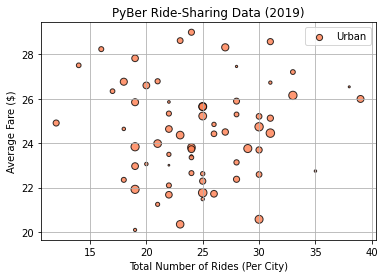

In [42]:
# Build the scatter plots for urban cities.
i = 0  #urban
plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=city_type_avg_driver_count[i], 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

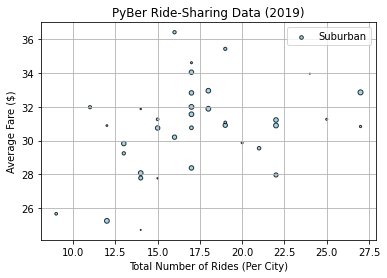

In [43]:
# Build the scatter plots for suburban cities.
i = 1  #suburban
plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=city_type_avg_driver_count[i], 
            c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

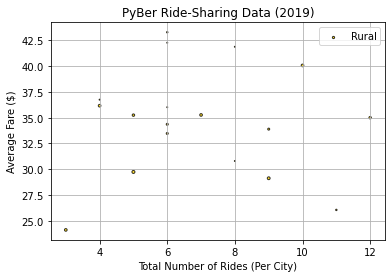

In [44]:
# Build the scatter plots for rural cities.
i = 2  #rural
plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=city_type_avg_driver_count[i], 
            c="gold", edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

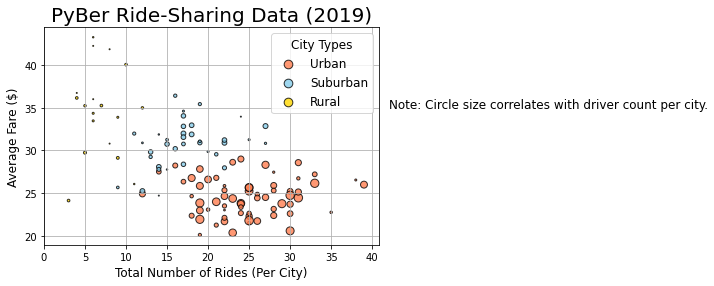

In [45]:
# Build the scatter charts for each city type.
colors = ["coral", "skyblue", "gold"]
for i in range(len(area_type)):
    plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=city_type_avg_driver_count[i], 
                c=colors[i], edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.xticks(np.arange(0, 41, step=5.0))
plt.grid(True)

# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize=12, mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)
# Save the figure.
plt.savefig('./analysis/Fig1.png', bbox_inches='tight', facecolor='w')
# Show the plot
plt.show()

In [46]:
# Display statistics of each city type
for i in range(len(area_type)):
#     display(area_type_df[i].describe())
# Calculate the mean of the ride count for each city type.
    display(area_type[i], round(city_type_ride_count[i].mean(),2), city_type_ride_count[i].describe())

urban_vs_rural_ride_count = round(city_type_ride_count[0].mean()/city_type_ride_count[2].mean(),2)
suburban_vs_rural_ride_count = round(city_type_ride_count[1].mean()/city_type_ride_count[2].mean(),2)
display(urban_vs_rural_ride_count, suburban_vs_rural_ride_count)

'Urban'

24.62

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

'Suburban'

17.36

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

'Rural'

6.94

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

3.55

2.5

In [47]:
# Calculate the median, mode of the ride count for each city type.
for i in range(len(area_type)):
    display(area_type[i], city_type_ride_count[i].median(), city_type_ride_count[i].mode())

'Urban'

24.0

0    22
1    25
Name: ride_id, dtype: int64

'Suburban'

17.0

0    17
Name: ride_id, dtype: int64

'Rural'

6.0

0    6
Name: ride_id, dtype: int64

In [48]:
# Calculate the measures of central tendency for the ride count for each city type.
for i in range(len(area_type)):
    mean_city_type_ride_count = np.mean(city_type_ride_count[i])
    median_city_type_ride_count = np.median(city_type_ride_count[i])
    mode_city_type_ride_count = sts.mode(city_type_ride_count[i])
    print(f"The mean for the ride counts for {area_type[i]} trips is {mean_city_type_ride_count:.2f}.")
    print(f"The median for the ride counts for {area_type[i]} trips is {median_city_type_ride_count}.")
    print(f"The mode for the ride counts for {area_type[i]} trips is {mode_city_type_ride_count}.\n")

The mean for the ride counts for Urban trips is 24.62.
The median for the ride counts for Urban trips is 24.0.
The mode for the ride counts for Urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).

The mean for the ride counts for Suburban trips is 17.36.
The median for the ride counts for Suburban trips is 17.0.
The mode for the ride counts for Suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).

The mean for the ride counts for Rural trips is 6.94.
The median for the ride counts for Rural trips is 6.0.
The mode for the ride counts for Rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).



In [49]:
# Get the fares and driver counts for each city type.
for i in range(len(area_type)):
    area_type_fares = type_fare[i]
    display(area_type[i], area_type_fares.head())
for i in range(len(area_type)):
    area_type_drivers = type_driver_count[i]
    display(area_type[i], area_type_drivers.head())

'Urban'

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

'Suburban'

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

'Rural'

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

'Urban'

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

'Suburban'

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

'Rural'

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [50]:
# Calculate the measures of central tendency for the average fare for each area_type.
for i in range(len(area_type)):
    mean_city_type_fares = np.mean(type_fare[i])
    median_city_type_fares = np.median(type_fare[i])
    mode_city_type_fares = sts.mode(type_fare[i])
    print(f"The mean fare price for {area_type[i]} trips is ${mean_city_type_fares:.2f}.")
    print(f"The median fare price for {area_type[i]} trips is ${median_city_type_fares:.2f}.")
    print(f"The mode fare price for {area_type[i]} trips is {mode_city_type_fares}.\n")

The mean fare price for Urban trips is $24.53.
The median fare price for Urban trips is $24.64.
The mode fare price for Urban trips is ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for Suburban trips is $30.97.
The median fare price for Suburban trips is $30.75.
The mode fare price for Suburban trips is ModeResult(mode=array([17.99]), count=array([3])).

The mean fare price for Rural trips is $34.62.
The median fare price for Rural trips is $37.05.
The mode fare price for Rural trips is ModeResult(mode=array([37.05]), count=array([2])).



In [51]:
# Calculate the measures of central tendency for the driver count for each area_type.
for i in range(len(area_type)):
    city_type_drivers = type_driver_count[i]
    mean_city_type_ride_count = np.mean(city_type_drivers)
    median_city_type_ride_count = np.median(city_type_drivers)
    mode_city_type_ride_count = sts.mode(city_type_drivers)
    print(f"The mean for the driver counts for {area_type[i]} trips is {mean_city_type_ride_count:.2f}.")
    print(f"The median for the driver counts for {area_type[i]} trips is {median_city_type_ride_count}.")
    print(f"The mode for the ride driver for {area_type[i]} trips is {mode_city_type_ride_count}.\n")

The mean for the driver counts for Urban trips is 36.68.
The median for the driver counts for Urban trips is 37.0.
The mode for the ride driver for Urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).

The mean for the driver counts for Suburban trips is 13.71.
The median for the driver counts for Suburban trips is 16.0.
The mode for the ride driver for Suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).

The mean for the driver counts for Rural trips is 4.30.
The median for the driver counts for Rural trips is 4.0.
The mode for the ride driver for Rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).



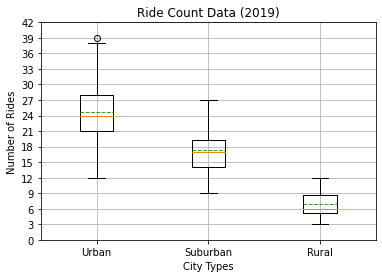

Summary Statistics
count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64


In [52]:
# Create a box-and-whisker plot for the ride count data of each city type.
fig, ax = plt.subplots()
ax.boxplot(city_type_ride_count, labels=area_type, meanline=True, showmeans=True)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_xlabel('City Types')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig('./analysis/Fig2.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()
print(f'Summary Statistics\n{city_type_ride_count[0].describe()}')

In [53]:
# Get the city that matches 39.
# i = 0  #urban
urban_city_outlier = city_type_ride_count[0][city_type_ride_count[0]==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


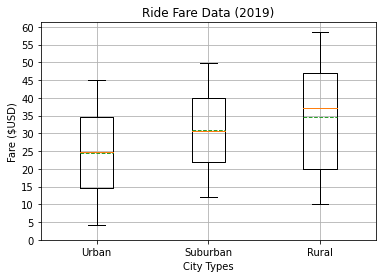

Summary Statistics
count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64


In [54]:
# Create a box-and-whisker plot for the fare data of each city type.
fig, ax = plt.subplots()
ax.boxplot(type_fare, labels=area_type, meanline=True, showmeans=True)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_xlabel('City Types')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
# Save the figure.
plt.savefig('./analysis/Fig3.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()
print(f'Summary Statistics\n{type_fare[0].describe()}')

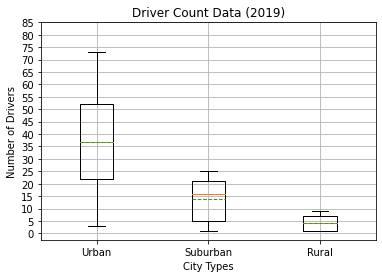

Summary Statistics
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64


In [55]:
# Create a box-and-whisker plot for the driver count data of each city type.
fig, ax = plt.subplots()
ax.boxplot(type_driver_count, labels=area_type, meanline=True, showmeans=True)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_xlabel('City Types')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 86, step=5.0))
ax.grid()
# Save the figure.
plt.savefig('./analysis/Fig4.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()
print(f'Summary Statistics\n{type_driver_count[0].describe()}')

In [56]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_df["fare"].sum()
sum_fares_by_type = pyber_df.groupby("type").sum()["fare"]
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares 
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

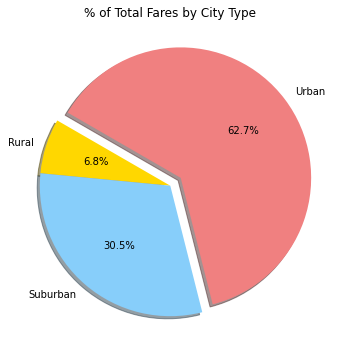

In [57]:
# Build the percentage of fares by city type pie chart.
# align x_labels and colors according to area_type
x_labels = np.sort(area_type)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

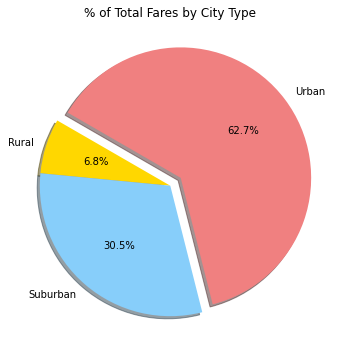

In [58]:
# Build Pie Chart
# align x_labels and colors to area_type
x_labels = np.sort(area_type)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig('./analysis/Fig5.png', facecolor='w')
# Show Figure
plt.show()

In [59]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * type_ride_count / total_ride_count
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

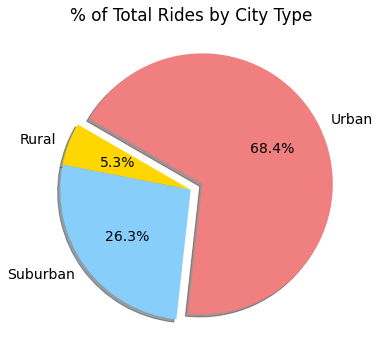

In [60]:
# Build Pie Chart
# align x_labels and colors to area_type
x_labels = np.sort(area_type)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig('./analysis/Fig6.png', facecolor='w')
# Show Figure
plt.show()

In [61]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * type_total_drivers / total_drivers
print(driver_percents, type_total_drivers)

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64 type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


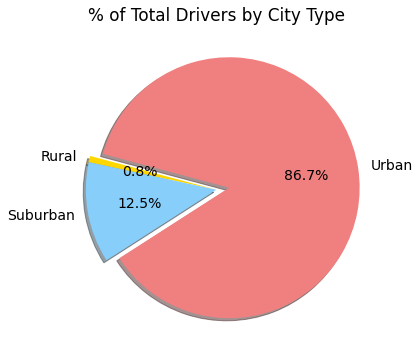

In [62]:
# Build Pie Chart
# align x_labels and colors to area_type
x_labels = np.sort(area_type)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%',
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Show Figure
plt.show()

In [63]:
total_drivers_cdf = city_df["driver_count"].sum()
type_total_drivers_cdf = city_df.groupby("type").sum()["driver_count"]
# Calculate the percentage of drivers for each city type.
driver_percents_cdf = 100 * type_total_drivers_cdf / total_drivers_cdf
print(driver_percents_cdf, type_total_drivers_cdf)

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64 type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


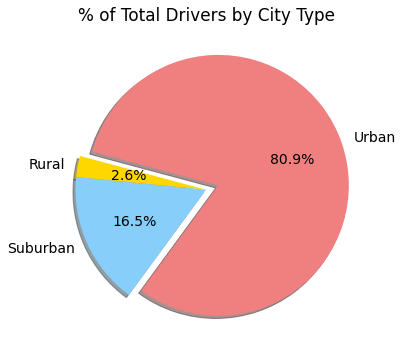

In [65]:
# Build Pie Chart
# align x_labels and colors to area_type
x_labels = np.sort(area_type)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents_cdf, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%',
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig('./analysis/Fig7.png', facecolor='w')
# Show Figure
plt.show()